In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
data = pd.read_csv("wine.csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


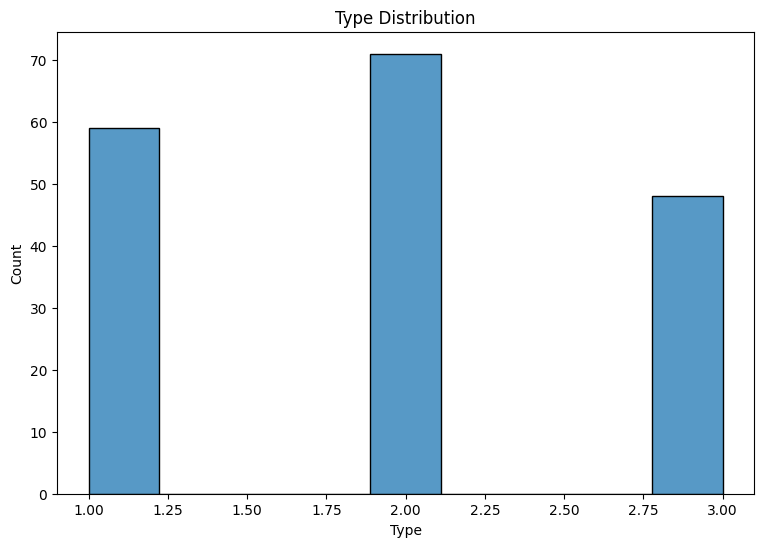

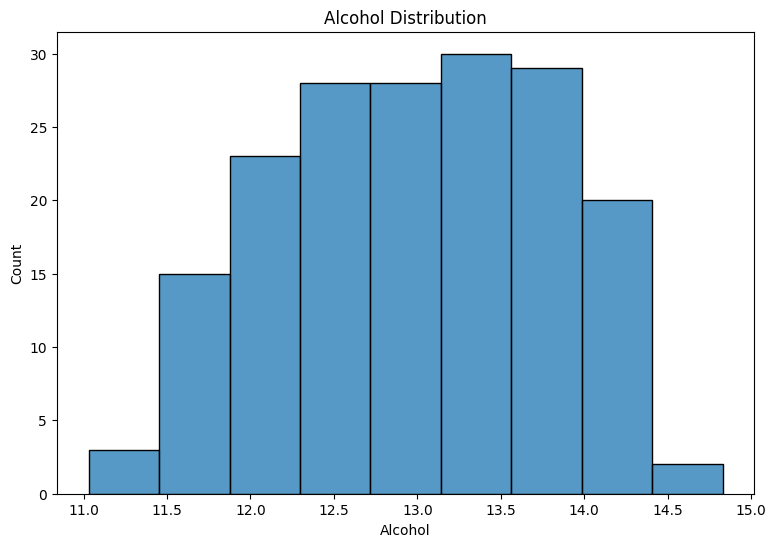

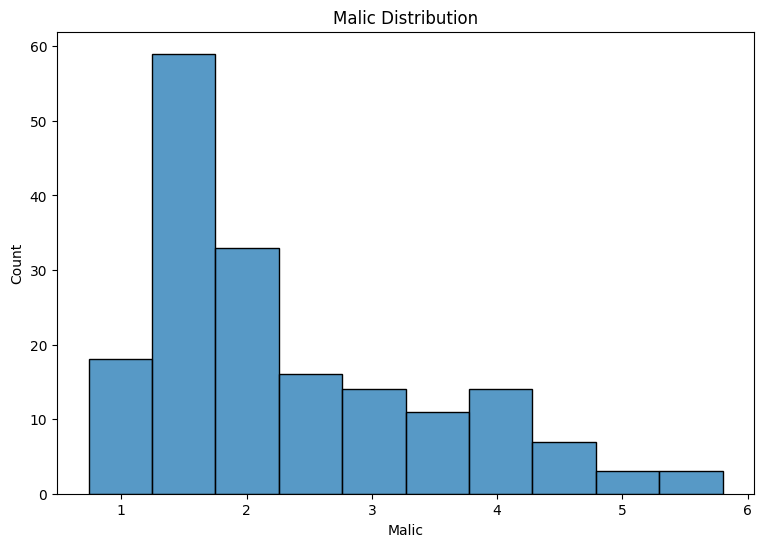

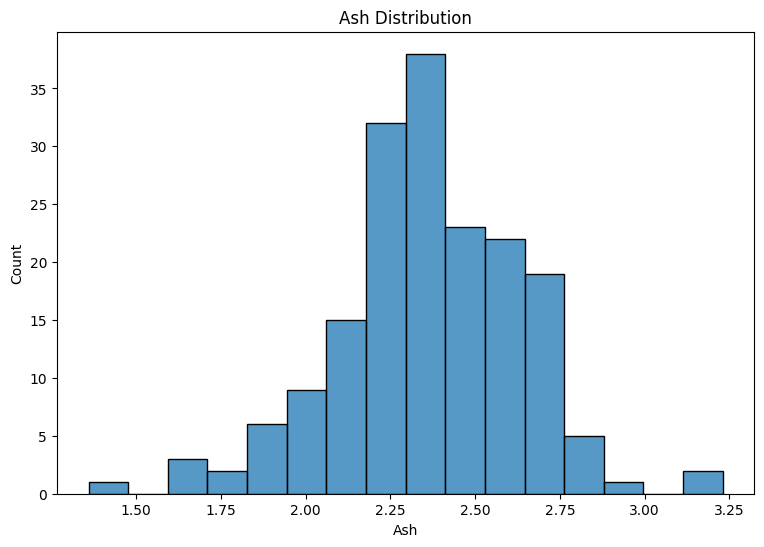

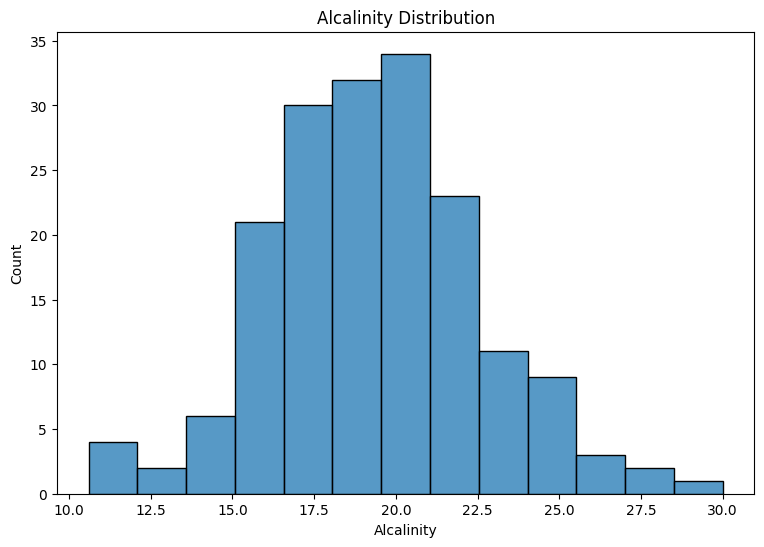

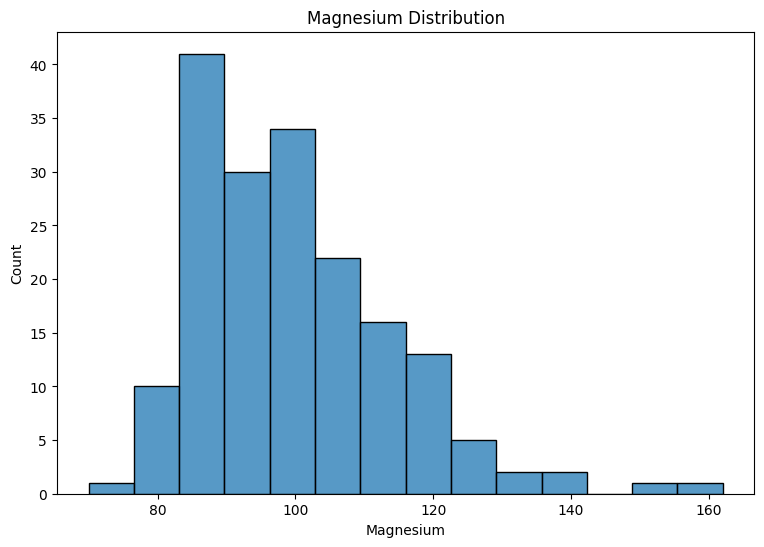

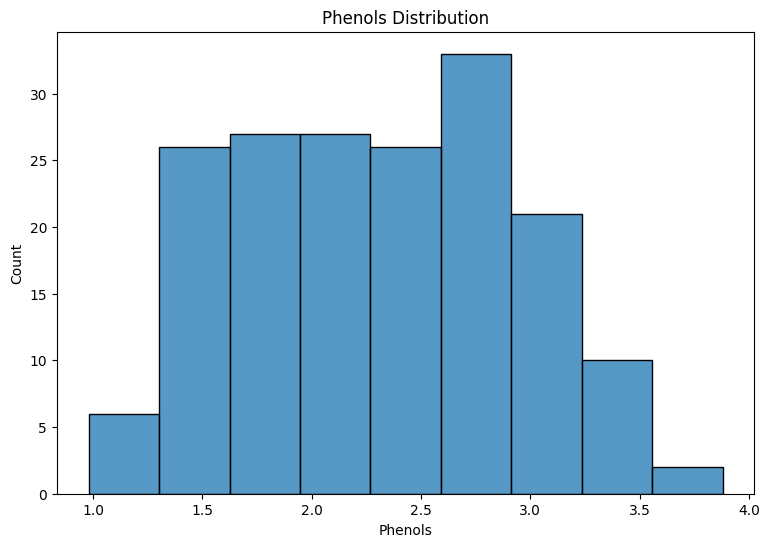

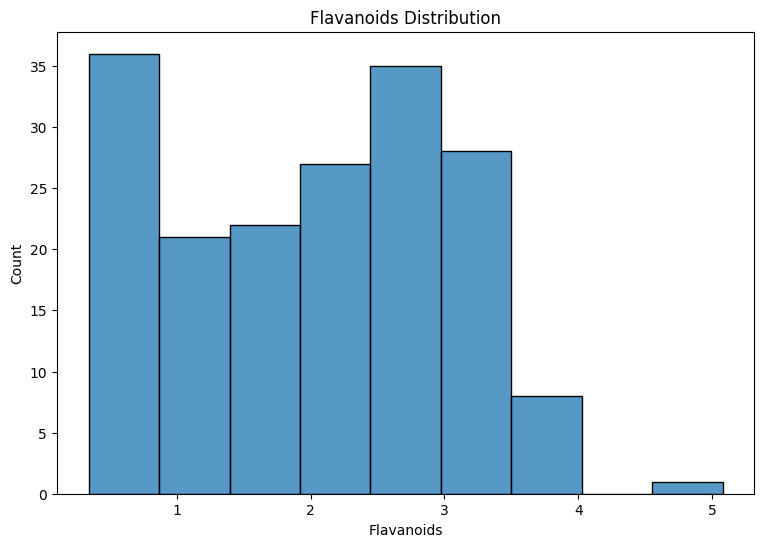

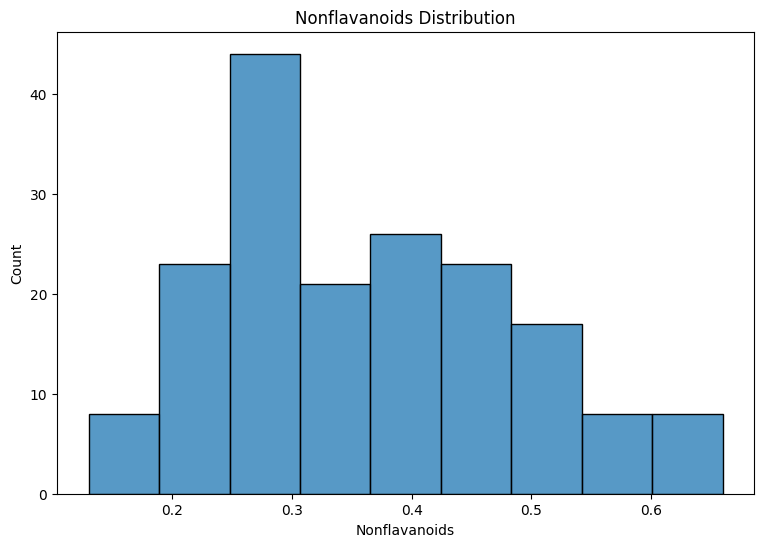

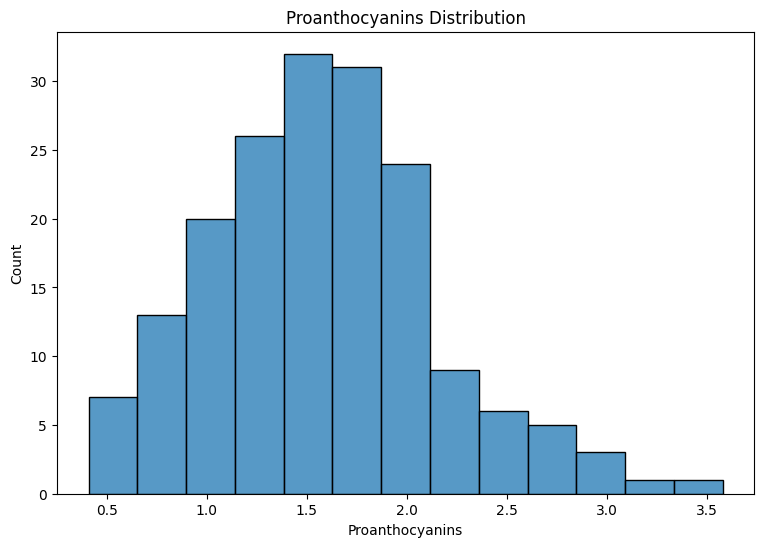

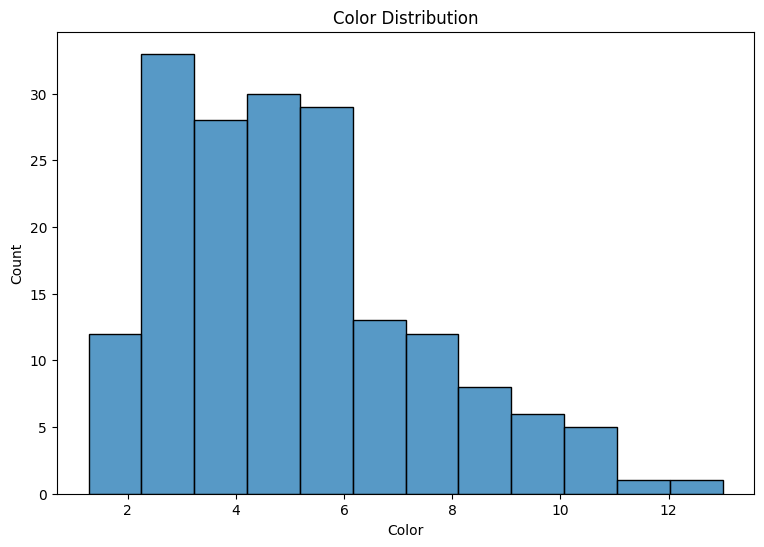

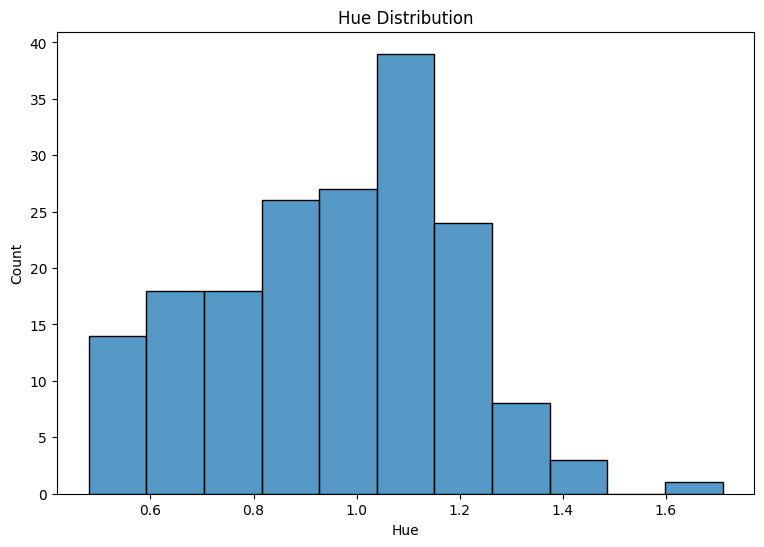

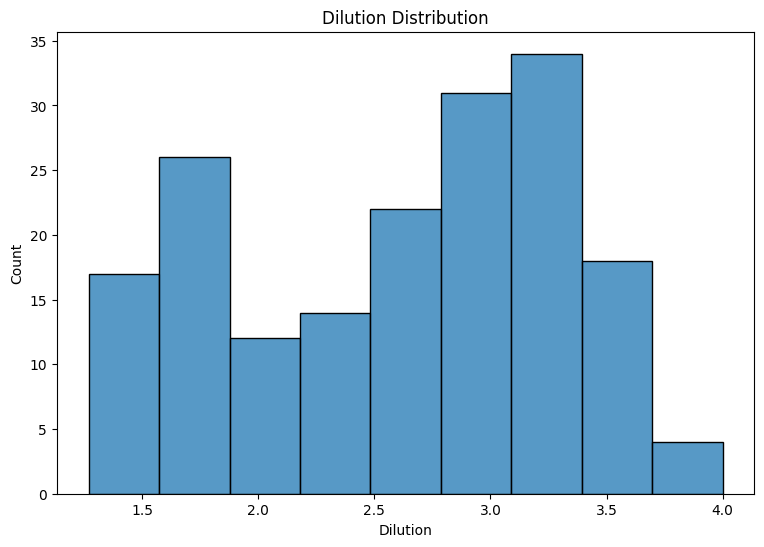

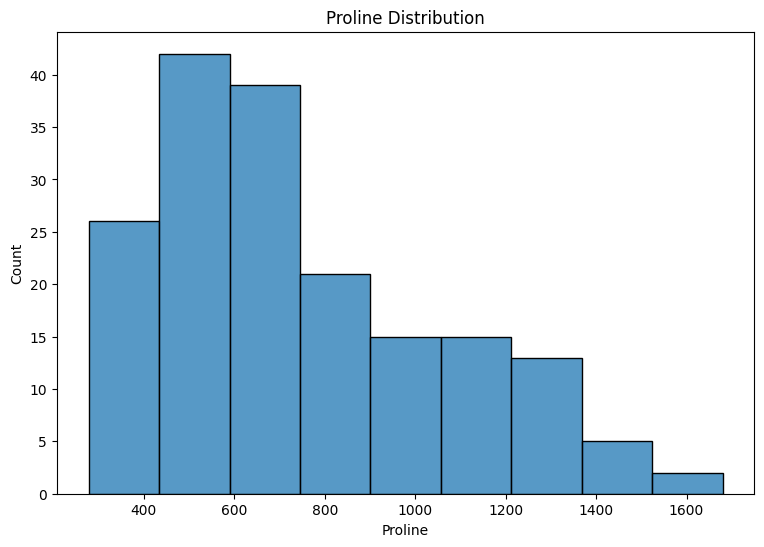

In [7]:
# Visualization

# histogram for each feature
for col in data.columns:
    fig = plt.figure(figsize=(9,6))
    sn.histplot(data[col])
    plt.title(f'{col} Distribution')
    plt.show()

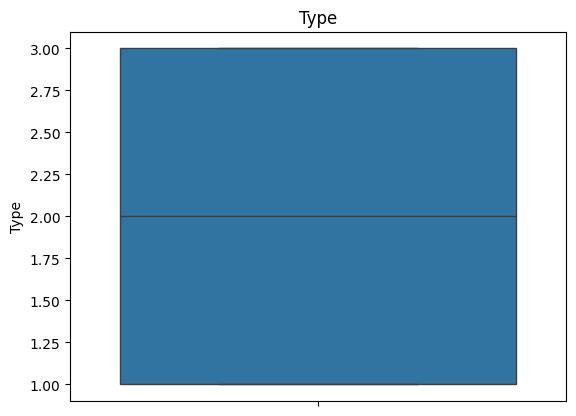

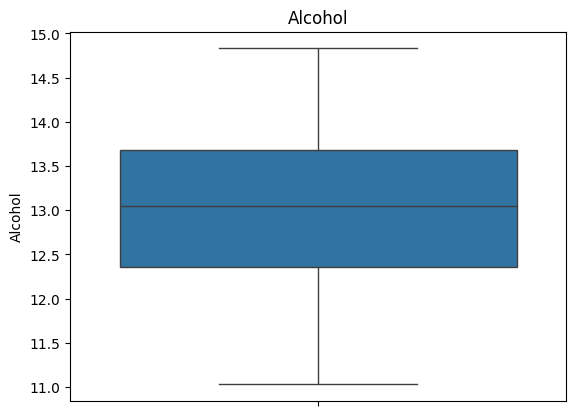

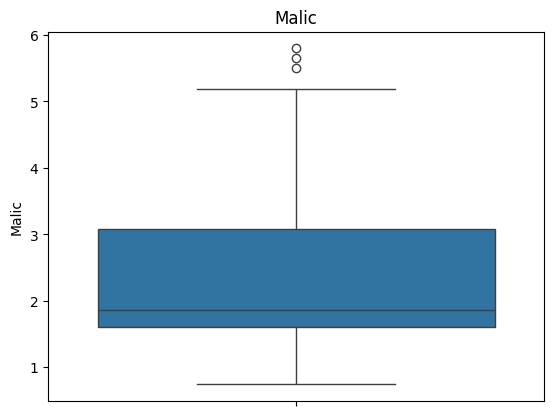

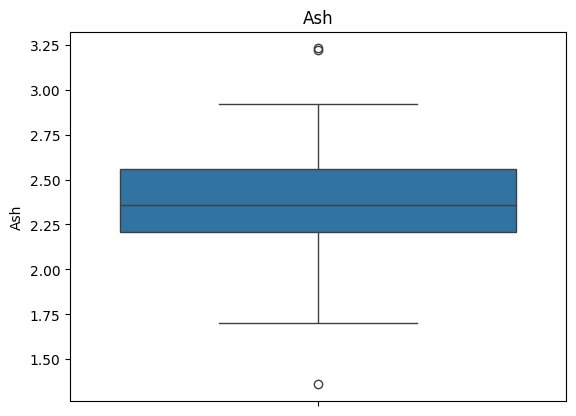

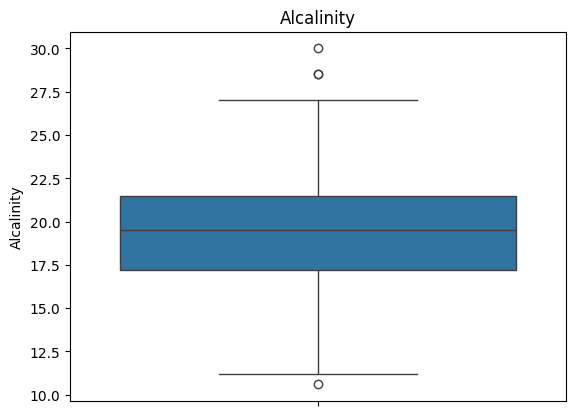

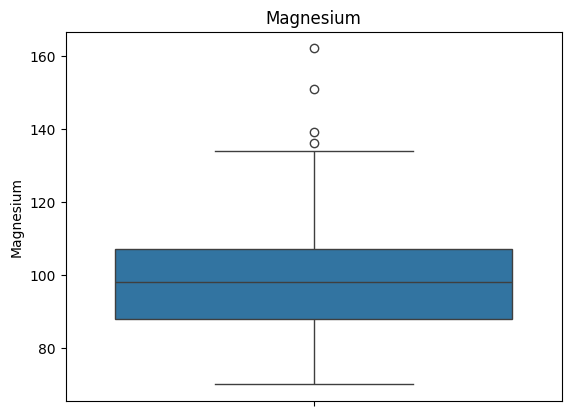

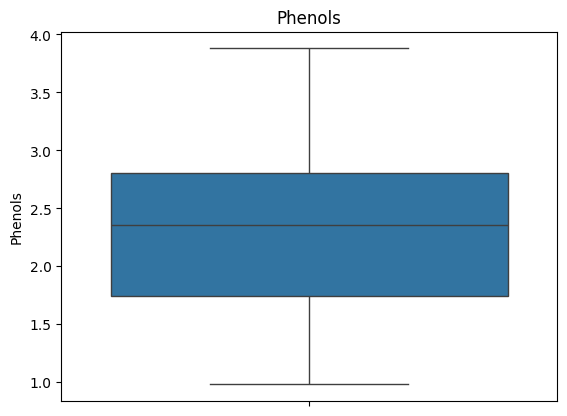

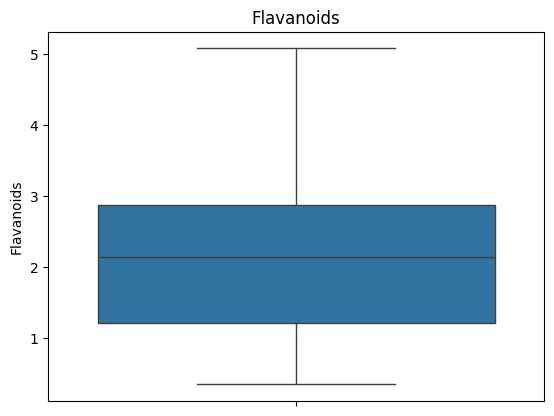

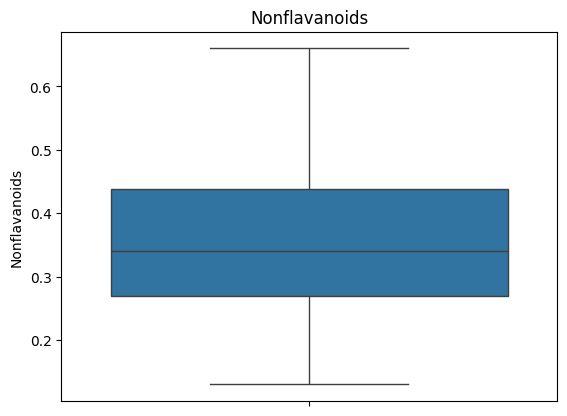

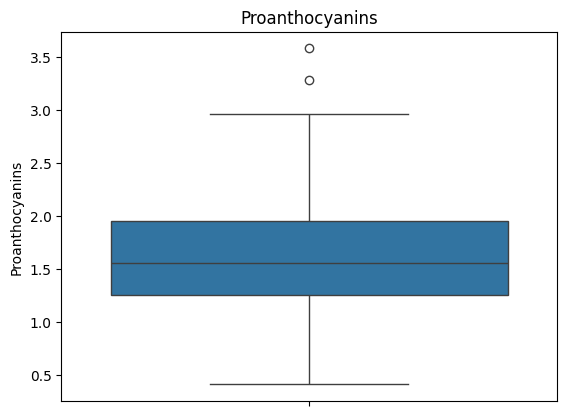

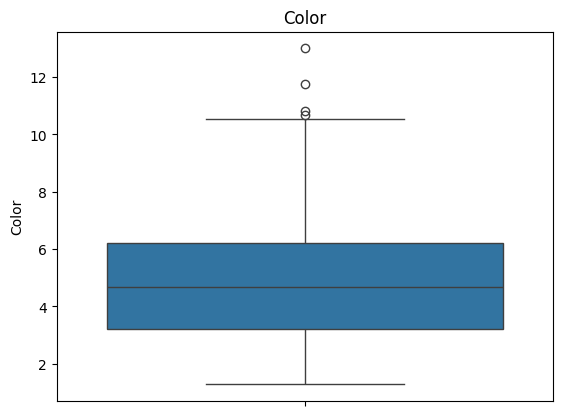

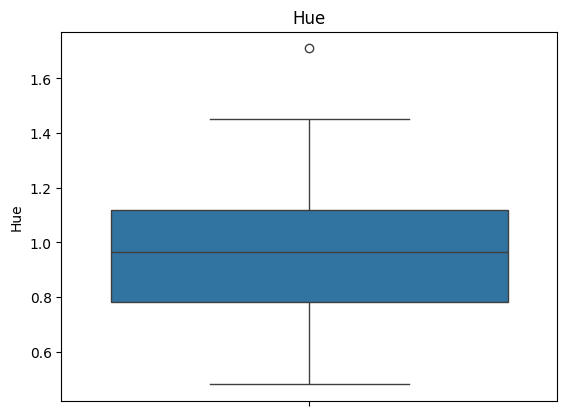

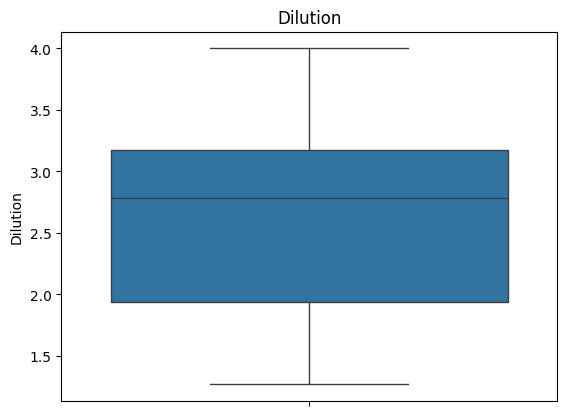

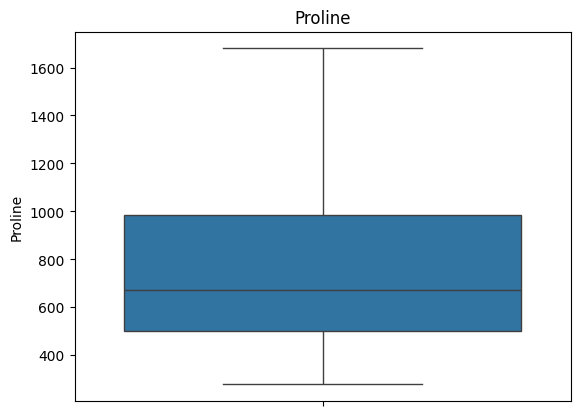

In [11]:
# Boxplot for each feature
for col in data.columns:
    sn.boxplot(data[col])
    plt.title(col)
    plt.show()

<Axes: >

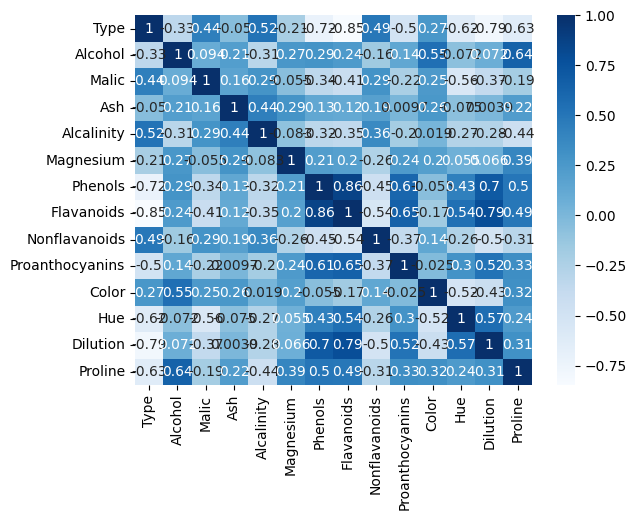

In [14]:
sn.heatmap(data.corr(),annot=True,cmap='Blues')

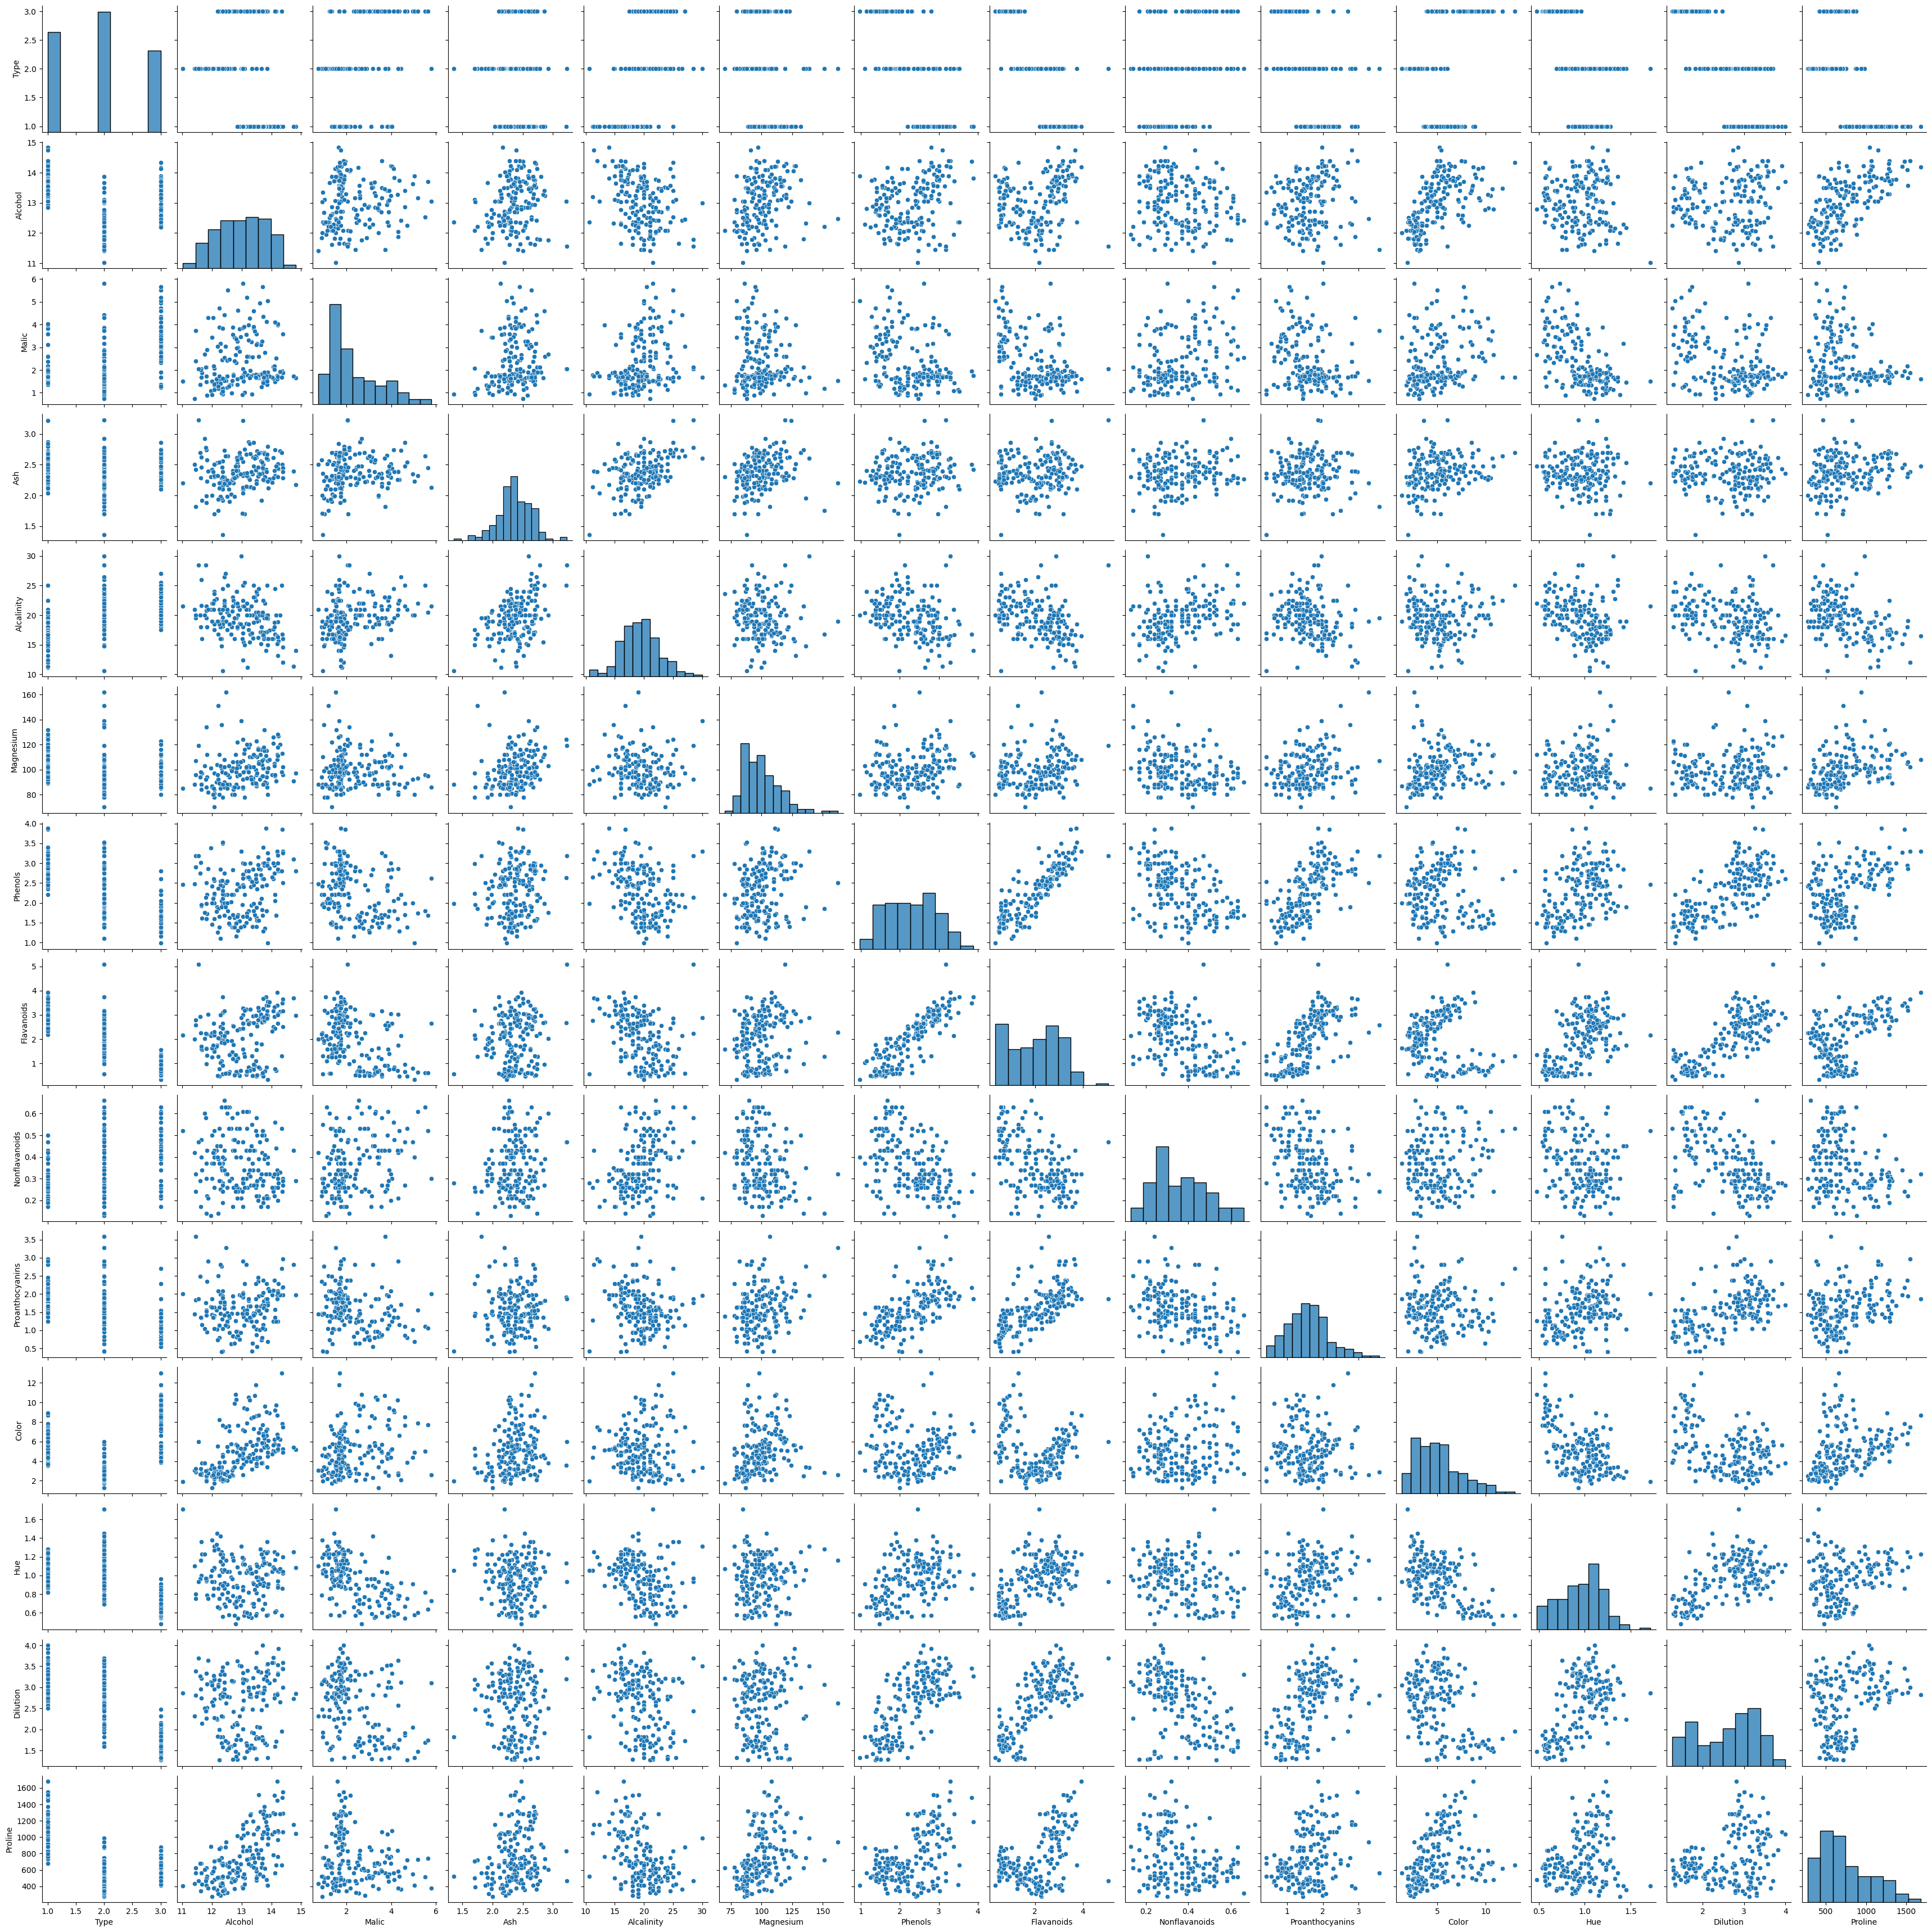

In [18]:
sn.pairplot(data)

In [20]:
# Removing Outliers

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [21]:
LL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR

In [23]:
data = data[~((data < LL) | (data > UL)).any(axis=1)]

Dimensionality Reduction with PCA

In [24]:
# Standardize the features
from sklearn.preprocessing import StandardScaler


In [25]:
X = data.drop('Type',axis=1)
y = data['Type']

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Implement PCA
from sklearn.decomposition import PCA

In [31]:
pca = PCA()
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_

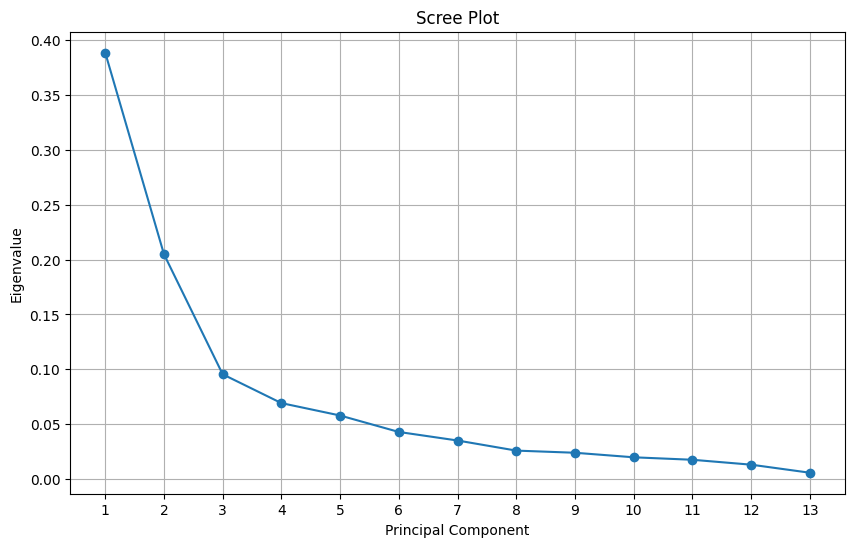

In [32]:
# Determine optimal number of Principle components

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

In [33]:
cum_var = np.cumsum(np.round(explained_variance,decimals=4)*100)
cum_var

array([ 38.85,  59.34,  68.89,  75.81,  81.6 ,  85.89,  89.4 ,  91.99,
        94.38,  96.36,  98.12,  99.43, 100.  ])

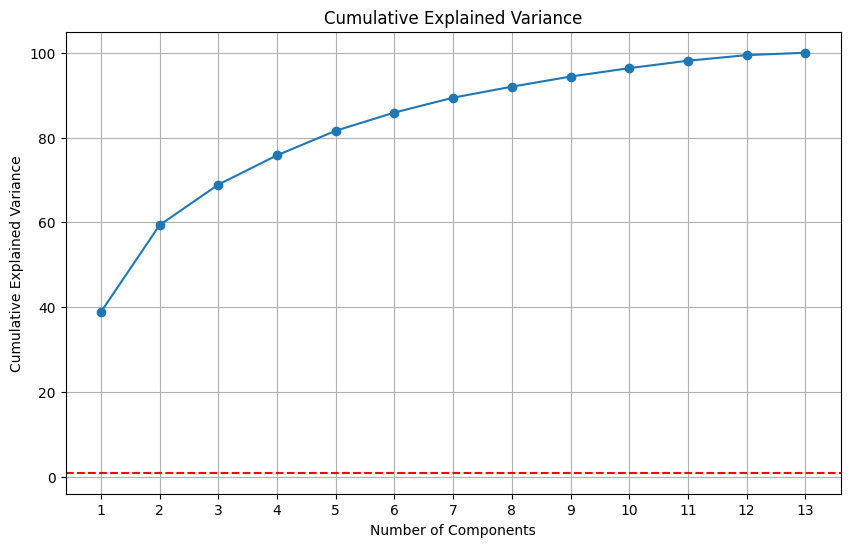

In [34]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o', linestyle='-')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cum_var) + 1))
plt.grid()
plt.show()

In [35]:
# Transform the orginal dataset info principle components

pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"Transformed shape: {X_pca.shape}")

Original shape: (161, 13)
Transformed shape: (161, 6)


Clustering with Original Data

In [36]:
from sklearn.cluster import KMeans


In [37]:
kmeans = KMeans(n_clusters=3,random_state=42)
cluster_original = kmeans.fit_predict(X_scaled)
data['Cluster_Original'] = cluster_original

<ipython-input-37-cdb5c0280277>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster_Original'] = cluster_original


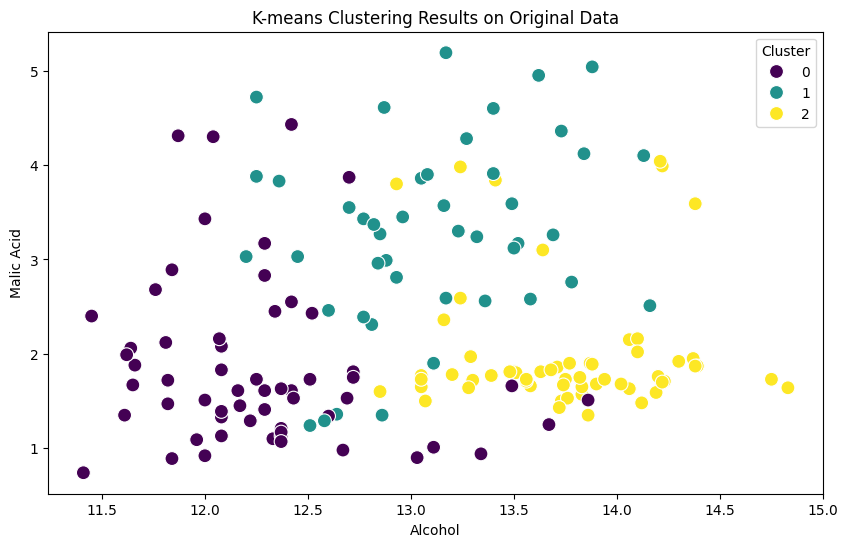

In [38]:
# Visualize clustering results

plt.figure(figsize=(10, 6))
sn.scatterplot(x=data['Alcohol'], y=data['Malic'], hue=data['Cluster_Original'], palette='viridis', s=100)
plt.title("KMeans Clustering Results with Original Data")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.legend(title='Cluster')
plt.show()

In [39]:
# Evaluate cluster performance
from sklearn.metrics import silhouette_score
silhouette_original = silhouette_score(X_scaled, cluster_original)
print(f'Silhouette Score : {silhouette_original}')

Silhouette Score : 0.3010147337033009


Clustering with PCA Data

In [40]:
kmeans_pca = KMeans(n_clusters=3,random_state=42)
cluster_pca = kmeans_pca.fit_predict(X_pca)
data['Cluster_PCA'] = cluster_pca

<ipython-input-40-3fe4697b32b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster_PCA'] = cluster_pca


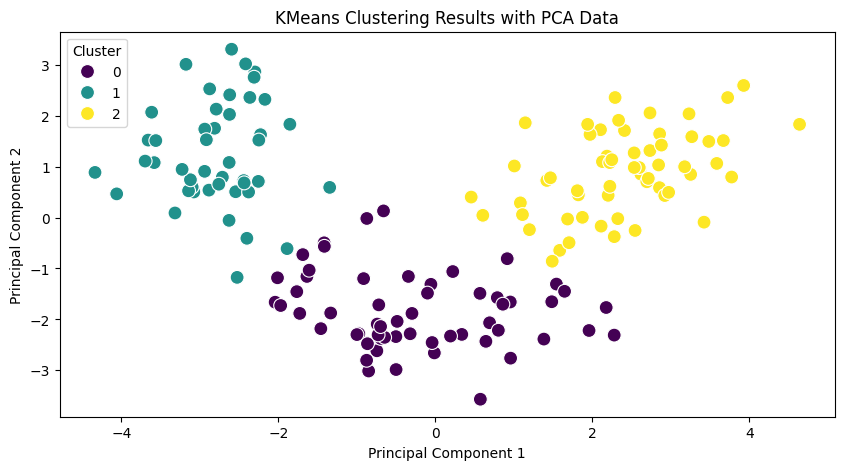

In [43]:
# Visualize cluster results

pc_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(6)])
pc_df['Cluster_PCA'] = cluster_pca

plt.figure(figsize=(10, 5))
sn.scatterplot(x=pc_df['PC1'], y=pc_df['PC2'], hue=pc_df['Cluster_PCA'], palette='viridis', s=100)
plt.title("KMeans Clustering Results with PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

In [45]:
# Evaluate clustering performance

silhouette_pca = silhouette_score(X_pca , cluster_pca)
print(f'Silhouette Score for PCA Data : {silhouette_pca}')

Silhouette Score for PCA Data : 0.36259661057639153


Comparison and Analysis

In [46]:
print(f'Silhouette Score Comparison:')
print(f'Original Data: {silhouette_original}')
print(f'PCA Data: {silhouette_pca}')

Silhouette Score Comparison:
Original Data: 0.3010147337033009
PCA Data: 0.36259661057639153


1) Improved Clustering Performance with PCA:

The silhouette score increased from 0.3010 (original data) to 0.3626 (PCA-transformed data), indicating that the PCA-transformed dataset led to more well-defined clusters.
PCA has helped in reducing noise or redundant features, likely simplifying the structure of the data and enabling better clustering.

2) Interpretation of Scores:

While both scores are not particularly high, the increase after PCA suggests that dimensionality reduction has made the clusters more distinct.
This is a common outcome when high-dimensional data contains correlated features, as PCA helps by transforming these features into a more efficient representation with fewer components.

3) Cluster Shape and Density:

The higher silhouette score for PCA data suggests that the clusters formed in lower-dimensional space are more compact and better separated compared to the original high-dimensional space.

Conclusion and Insights

1) Impact of PCA on Clustering -

PCA significantly improved clustering performance by increasing the silhouette score, indicating that the dimensionality reduction process was effective at retaining the important variance in the data.
The clusters formed in the PCA-transformed space were more distinct than those formed on the original data.

2) Practical Implications -

When to Use PCA: PCA is a valuable preprocessing step when dealing with high-dimensional datasets with correlated features. It can simplify the data while preserving essential variance, leading to better clustering or other machine learning tasks.
When to Use Original Data: If the dataset is already low-dimensional or if the features are uncorrelated, PCA may not provide significant benefits.

3) Recommendations -

PCA should be considered whenever a dataset has many features with potential redundancy, especially when subsequent tasks like clustering or classification are sensitive to high dimensionality.
However, the dimensionality reduction should be balanced with the need to preserve enough components to retain critical variance for modeling tasks.